# Week2授業課題1 二次元配列と勾配問題

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 【問題1】1次関数
x が-50から50の範囲で次の式を考えます。

y = 1 2 x + 1 -50から50まで0.1間隔のxを表すndarrayと、各要素に対するyを表すndarrayを作成してください。

In [2]:
x = np.arange(-50, 50.1, 0.1)

In [3]:
def func(x):
    y = (1/2)*x + 1
    return y

In [5]:
y = func(x)
y

array([-24.  , -23.95, -23.9 , ...,  25.9 ,  25.95,  26.  ])

## 【問題2】配列の結合
問題1で作成したndarrayを結合し、(1001, 2)の形の配列にしてください。0列目にx、1列目にyが来るようにします。

In [7]:
xy_array = np.zeros((1001, 2))

xy_array[:,0] = x
xy_array[:,1] = y

xy_array.shape

(1001, 2)

## 【問題3】勾配を求める
各x座標における勾配を求めます。ここで勾配はyの変化量をxの変化量で割ることで計算します。

In [8]:
x_diff = x[1:] - x[:-1]
y_diff = y[1:] - y[:-1]

xy_slope = y_diff / x_diff
xy_slope.shape

(1000,)

## 【問題4】グラフを描く
1次関数のグラフをMatplotlibを用いて描いてください。また、それとは別に横軸をx、縦軸を勾配としたグラフも描いてください。

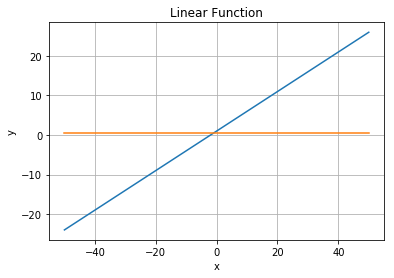

In [9]:
graph_xy_slope = np.append(xy_slope, 0.5)

plt.title("Linear Function")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.plot(x, y)

plt.plot(x, graph_xy_slope)

## 【問題5】Pythonの関数化
問題1から問題3までの範囲をまとめて行うPythonの関数を雛形を参考に作成してください。 の範囲は前2つが-50から50、最後の1つが0から50です。0.1間隔でndarrayを作成してください。

また、問題4と同様にグラフを描いてください。

ndarrayに対して三角関数のsinの計算を行うには np.sin()を用います。

In [10]:
def func1(x):
    y = x**2
    return y

def func2(x):
    y = 2*x**2 + 2**x
    return y

def func3(x):
    y = np.sin(x**0.5)
    return y

In [15]:
def compute_gradient(function, x_range=np.arange(-50, 50.1, 0.1)):
    y = function(x_range)
    x_diff = x_range[1:] - x_range[:-1]
    y_diff = y[1:] - y[:-1]
    slope = y_diff / x_diff
    
    con_array = np.zeros((len(x_range), 2))
    con_array[:,0] = x
    con_array[:,1] = y
    return slope, con_array

def compute_gradient_sin(function, x_range=np.arange(0, 50.1, 0.1)):
    y = function(x_range)
    x_diff = x_range[1:] - x_range[:-1]
    y_diff = y[1:] - y[:-1]
    slope = y_diff / x_diff
    
    con_array = np.zeros((len(x_range), 2))
    con_array[:,0] = x_range
    con_array[:,1] = y
    return slope, con_array

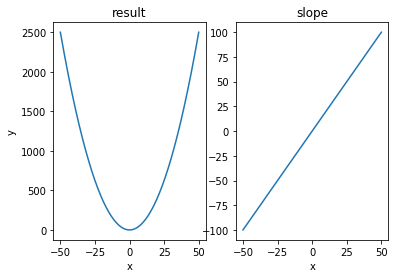

In [16]:
#func1のグラフ  y=x**2
func1_num = compute_gradient(func1)[1]
func1_slope = compute_gradient(func1)[0]
plt.subplot(121)
plt.title("result")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(func1_num[:,0], func1_num[:,1])

#func1勾配のグラフ
func1_num_del = np.delete(func1_num, -1, 0)  #y軸（勾配）の数に合わせるため最後の行を削除
plt.subplot(122)
plt.title("slope")
plt.xlabel("x")
plt.plot(func1_num_del[:,0], func1_slope)

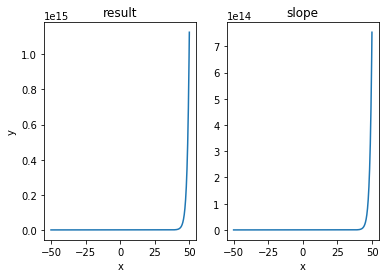

In [17]:
#func2のグラフ  y = 2*x**2 + 2**x
func2_num = compute_gradient(func2)[1]
func2_slope = compute_gradient(func2)[0]
plt.subplot(121)
plt.title("result")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(func2_num[:,0], func2_num[:,1])

#func2勾配のグラフ
func2_num_del = np.delete(func2_num, -1, 0)  #y軸（勾配）の数に合わせるため最後の行を削除
plt.subplot(122)
plt.title("slope")
plt.xlabel("x")
plt.plot(func2_num_del[:,0], func2_slope)


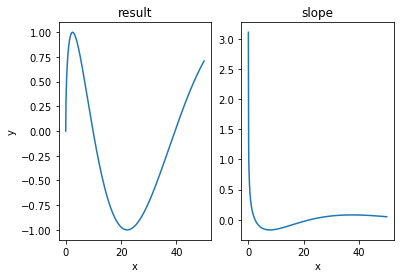

In [18]:
#func3のグラフ   y = np.sin(x**0.5)
func3_num = compute_gradient_sin(func3)[1]
func3_slope = compute_gradient_sin(func3)[0]
plt.subplot(121)
plt.title("result")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(func3_num[:,0], func3_num[:,1])

#func3勾配のグラフ
func3_num_del = np.delete(func3_num, -1, 0)  #y軸（勾配）の数に合わせるため最後の行を削除
plt.subplot(122)
plt.title("slope")
plt.xlabel("x")
plt.plot(func3_num_del[:,0], func3_slope)

## 【問題6】最小値を求める
問題5で扱った関数のyの最小値を求めます。xの範囲も問題5と同様とします。

今回は勾配降下法ではなく、ndarrayのminメソッド、argminメソッドを用いてください。minメソッドは最小値を、argminメソッドは最小値のインデックスを取得することができます。

また、最小のyをとる前後の勾配を表示してください。

In [19]:
def compute_gradient_min(function, x_range=np.arange(-50, 50.1, 0.1)):
    y = function(x_range)
    x_diff = x_range[1:] - x_range[:-1]
    y_diff = y[1:] - y[:-1]
    slope = y_diff / x_diff
    
    con_array = np.zeros((len(x_range), 2))
    con_array[:,0] = x_range
    con_array[:,1] = y
    
    y_min = y.min()
    y_argmin = y.argmin()
    y_argmin_back = slope[y_argmin -1]
    y_argmin_front = slope[y_argmin + 1]
    return y_min, y_argmin, y_argmin_back, y_argmin_front

def compute_gradient_sin_min(function, x_range=np.arange(0, 50.1, 0.1)):
    y = function(x_range)
    x_diff = x_range[1:] - x_range[:-1]
    y_diff = y[1:] - y[:-1]
    slope = y_diff / x_diff
    
    con_array = np.zeros((len(x_range), 2))
    con_array[:,0] = x_range
    con_array[:,1] = y
    
    y_min = y.min()
    y_argmin = y.argmin()
    y_argmin_back = slope[y_argmin -1]
    y_argmin_front = slope[y_argmin + 1]
    return y_min, y_argmin, y_argmin_back, y_argmin_front

In [25]:
func1_min, func1_argmin, func1_argmin_back, func1_argmin_front = compute_gradient_min(func1)
print("func1の最小値は:",func1_min)
print("func1の最小のインデックスは:",func1_argmin)
print("func1の最小の一つ手前の勾配は:",func1_argmin_back)
print("func1の最小の一つ後の勾配は:",func1_argmin_front)

func1の最小値は: 5.048709793414476e-25
func1の最小のインデックスは: 500
func1の最小の一つ手前の勾配は: -0.09999999999858034
func1の最小の一つ後の勾配は: 0.30000000000142535


In [26]:
func2_min, func2_argmin, func2_argmin_back, func2_argmin_front = compute_gradient_min(func2)
print("func2の最小値は:",func2_min)
print("func2の最小のインデックスは:",func2_argmin)
print("func2の最小の一つ手前の勾配は:",func2_argmin_back)
print("func2の最小の一つ後の勾配は:",func2_argmin_front)

func2の最小値は: 0.9505505632959851
func2の最小のインデックスは: 498
func2の最小の一つ手前の勾配は: -0.4170183305979998
func2の最小の一つ後の勾配は: 0.4696700846350943


In [27]:
func3_min, func3_argmin, func3_argmin_back, func3_argmin_front = compute_gradient_sin_min(func3)
print("func3の最小値は:",func3_min)
print("func3の最小のインデックスは:",func3_argmin)
print("func3の最小の一つ手前の勾配は:",func3_argmin_back)
print("func3の最小の一つ後の勾配は:",func3_argmin_front)

func3の最小値は: -0.9999997540298113
func3の最小のインデックスは: 222
func3の最小の一つ手前の勾配は: -0.0006388422559544435
func3の最小の一つ後の勾配は: 0.0016061158921243152
